In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from cycler import cycler
import seaborn as sns
import pandas as pd
import sys
import os

path='/home/vmesle/Documents/Obsidian/Python/0-My_module'
sys.path.append(path)
from fct_math import regrpoly

# plt.style.use('seaborn-whitegrid')

%matplotlib inline

/home/vmesle/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
title = 'default internal resistance model of battery 1U'
monRepertoire = r'/home/virgil/Downloads/S-BAND/S-BAND TVAC'
rep_results = monRepertoire+r'/courbes'

In [ ]:
values = []

In [4]:
x = np.linspace(-40,60, 101)
dic = {
'R_bat_mOhm' : [i*20 for i in values]
}

In [14]:
x_lim = np.linspace(min(x), max(x))

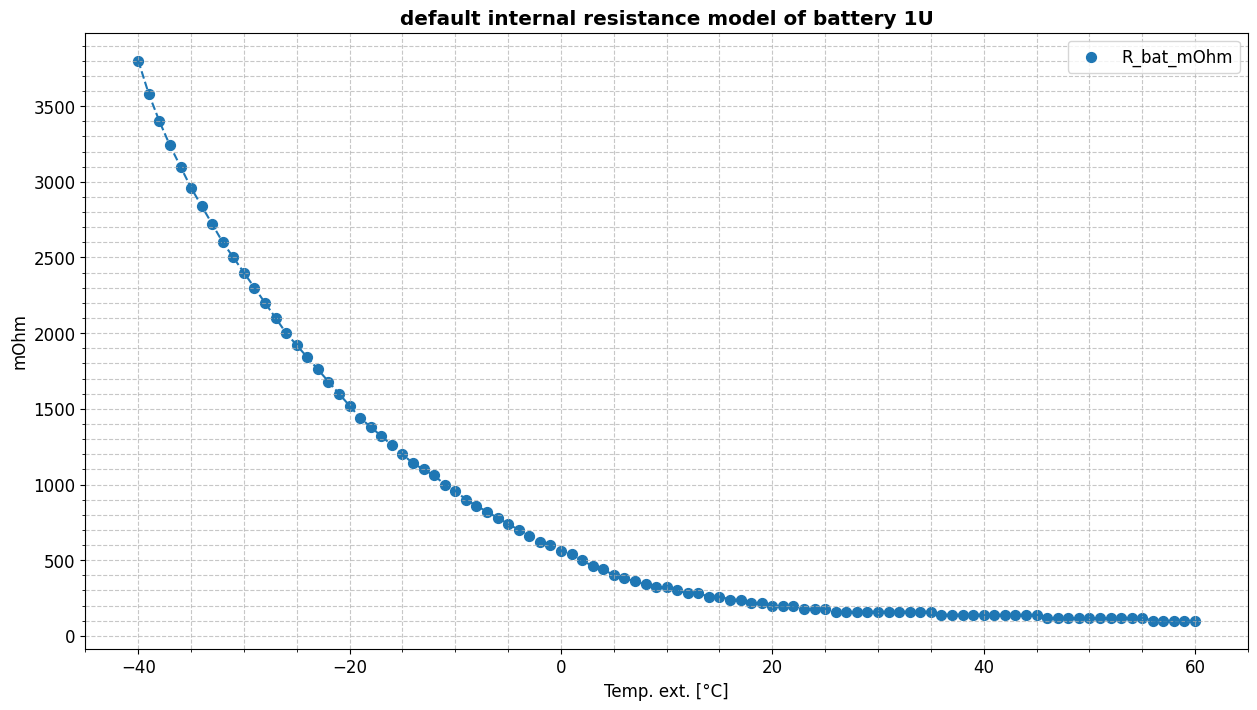

In [6]:
plt.rcParams["figure.figsize"] = [15,8]
plt.rcParams['font.size'] = '12'
# PLOT

# plt.plot(x_lim, p1(x_lim), c='k', linewidth = 1, alpha = 0.5, label='linear ' + R_linear)
# plt.plot(x_lim, p2(x_lim), '--', c='k' , alpha = 0.8 , label = 'quadratic ' + R_quadratic)

for i in dic :
    plt.scatter(x,dic[i], label=i, s=50)
    plt.plot(x,dic[i], ls = '--')

# plt.plot(x_lim, x_lim, 'k:')



# LEGEND
plt.legend(bbox_to_anchor=(1.05, 0.5, 0.3, 0.2), loc='upper left')
plt.legend(loc = 'best',ncol = 1)

plt.title(title, fontweight="bold")

# LABELS
plt.ylabel('mOhm')
plt.xlabel('Temp. ext. [°C]')

# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

# plt.savefig(rep_results + '\Curve_' + title + '.png', facecolor = 'white' ,bbox_inches='tight')

plt.show()

In [66]:
import pandas as pd
from datetime import timedelta

tps_plateaux = 8

# Exemple de liste de timedelta
timedelta_list = [
    timedelta(hours=1),
]                  

# Données pour le DataFrame


# Créer un DataFrame en utilisant la liste de timedelta comme index
df = pd.DataFrame(data, index=timedelta_list, columns=['values'])
df.index = df.index.astype('timedelta64[s]')
print(df)


        values
1 days      10
2 days      20
3 days      30
4 days      40


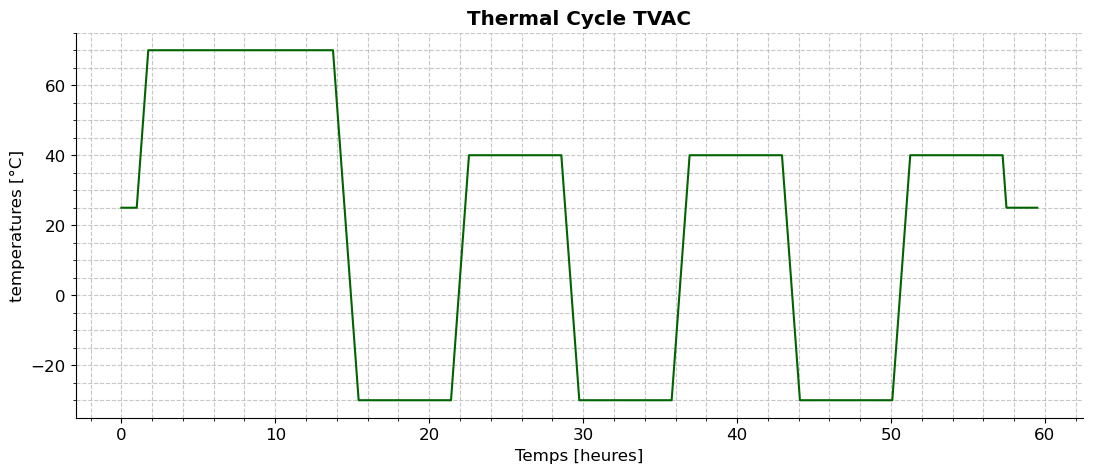

In [117]:
import pandas as pd
from datetime import timedelta
import matplotlib.pyplot as plt

palier_durations_heures = [
    1, # first vacuum tests
    12, # bake out 
    6, # cold 1
    6, # hot 1
    6, # cold 2
    6, # hot 2
    6, # cold 3
    6, # hot 3
    2, #back to reallity
    2,
    ]

# Durée de chaque palier en minutes
palier_durations = [h*60 for h in palier_durations_heures]  # Durée de chaque palier en minutes

# Valeur de chaque palier
palier_values = [25,       # first vacuum tests    
                 70,       # bake out 
                 -30,      # cold 1
                 40,       # hot 1
                 -30,      # cold 2
                 40,       # hot 2
                 -30,      # cold 3
                 40,       # hot 3
                 25,       #back to reallity
                 25,
                 ]  # Niveaux de chaque palier

# Pente entre les paliers (unités par minute)
pentes = [1]*len(palier_durations[:-1])  # Pente pour atteindre le palier suivant

# Initialiser les données pour le DataFrame
times = []
values = []

# Point de départ
current_time = timedelta(minutes=0)

for i in range(len(palier_values) - 1):
    # Niveau actuel et suivant
    value = palier_values[i]
    next_value = palier_values[i + 1]
    
    # Ajouter le palier actuel
    times.append(current_time)
    values.append(value)
    
    # Avancer jusqu'à la fin du palier (point constant)
    current_time += timedelta(minutes=palier_durations[i])
    times.append(current_time)
    values.append(value)  # Maintenir la valeur du palier à la fin de la durée

    # Calcul de la durée de transition en fonction de la pente
    difference = next_value - value
    transition_duration = abs(difference / pentes[i])  # Temps pour atteindre le prochain palier en minutes
    num_steps = int(transition_duration)  # Nombre de points intermédiaires dans la transition
    
    # Ajouter les points intermédiaires pour la transition
    for step in range(1, num_steps + 1):
        current_time += timedelta(minutes=1)  # Intervalle de 1 minute entre chaque point de transition
        times.append(current_time)
        interpolated_value = value + pentes[i] * step * (1 if difference > 0 else -1)
        values.append(interpolated_value)

# Ajouter le dernier palier sans transition
times.append(current_time)
values.append(palier_values[-1])

# Créer le DataFrame avec les times en index et values comme niveaux
df = pd.DataFrame(values, index=pd.to_timedelta(times), columns=['niveau'])

# Tracer les données avec matplotlib sans pandas
time_values = (df.index.total_seconds() / 3600 ).values # Conversion en heures
niveau_values = df['niveau'].tolist()

# Créer le graphique
plt.figure(figsize=(13, 5))
plt.plot(time_values, niveau_values, c='darkgreen', linestyle='-') #, marker='o'


# Ajouter des labels et un titre
plt.title("Thermal Cycle TVAC", fontweight="bold")
plt.xlabel("Temps [heures]")
plt.ylabel("temperatures [°C]")


# GRILLES
plt.minorticks_on() #Grille mineure
plt.grid(True, which='both') 
plt.grid(alpha=0.7,which='both', linestyle='--')

plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.savefig('/home/virgil/Downloads/S-BAND/S-BAND TVAC/courbes/TVAC_cycles.png', facecolor = 'white' ,bbox_inches='tight')

plt.show()
